In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/results/clones/variants.init_knnRes.3/aggregate/clone_sizes"
se_cells_meta_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/results/clones/variants.init_knnRes.3/aggregate/cells_meta.csv"
#sample_names = "Control,Flt3l,Input"
min_cell = 1
keep_top = 20
keep_top_single = 10 # for the plots with same donor



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import numpy as np
%matplotlib inline

In [3]:
figures_d = {"f1a": "clone_counts.shareY.pdf",
             "f1b": "clone_counts.noShareY.pdf",
             "f2": "norm.clone_counts.shareY.pdf",
             "f3a": "norm.top.clone_counts.shareY.pdf",
             "f3b": "norm.top.clone_counts.noShareY.pdf",
             "f4": "norm.top.clone_counts.samePanel.pdf",
             "f5a": "inputOnly.norm.top.clone_counts.samePanel.pdf",
             "f5b": "inputOnly.sqrt_norm.top.clone_counts.samePanel.pdf",
             "f6": "inputOnly.norm.top.clone_counts.samePanel.pdf"}

for i in figures_d:
    figures_d[i] = join(outdir, figures_d[i])
figures_d

{'f1a': '/data/Mito_Trace/output/aggregate/CHIP_aggr/results/clones/variants.init_knnRes.3/aggregate/clone_sizes/clone_counts.shareY.pdf',
 'f1b': '/data/Mito_Trace/output/aggregate/CHIP_aggr/results/clones/variants.init_knnRes.3/aggregate/clone_sizes/clone_counts.noShareY.pdf',
 'f2': '/data/Mito_Trace/output/aggregate/CHIP_aggr/results/clones/variants.init_knnRes.3/aggregate/clone_sizes/norm.clone_counts.shareY.pdf',
 'f3a': '/data/Mito_Trace/output/aggregate/CHIP_aggr/results/clones/variants.init_knnRes.3/aggregate/clone_sizes/norm.top.clone_counts.shareY.pdf',
 'f3b': '/data/Mito_Trace/output/aggregate/CHIP_aggr/results/clones/variants.init_knnRes.3/aggregate/clone_sizes/norm.top.clone_counts.noShareY.pdf',
 'f4': '/data/Mito_Trace/output/aggregate/CHIP_aggr/results/clones/variants.init_knnRes.3/aggregate/clone_sizes/norm.top.clone_counts.samePanel.pdf',
 'f5a': '/data/Mito_Trace/output/aggregate/CHIP_aggr/results/clones/variants.init_knnRes.3/aggregate/clone_sizes/inputOnly.norm.t

In [4]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
se_cells_meta

,Unnamed: 0,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,cluster_labels
0,Input_AAACGAAAGGAAACTT-1,Input,2831,2831,49701.0,5002,164,92,1138,37812,...,2,3505,2884,AAACGAAAGGAAACTT-1_Input,Input_AAACGAAAGGAAACTT-1,4,CHIP_a1_4,Input,CHIP_a1_4_4,2
1,Input_AAACGAAGTCCAAGAG-1,Input,4565,4565,62869.0,9096,249,139,1902,42086,...,0,6161,4469,AAACGAAGTCCAAGAG-1_Input,Input_AAACGAAGTCCAAGAG-1,1,CHIP_a1_3,Input,CHIP_a1_3_1,0
2,Input_AAACGAAGTCCGAGCT-1,Input,7229,7229,60574.0,11583,352,141,2087,31767,...,1,9778,6201,AAACGAAGTCCGAGCT-1_Input,Input_AAACGAAGTCCGAGCT-1,23,CHIP_a1_0,Input,CHIP_a1_0_23,1
3,Input_AAACGAAGTTCAGAAA-1,Input,2846,2846,32202.0,4591,146,90,911,19849,...,0,3786,2952,NaN,Input_AAACGAAGTTCAGAAA-1,None,CHIP_a1_None,None,CHIP_a1_None,0
4,Input_AAACGAAGTTTGAAGA-1,Input,7001,7001,68829.0,12010,432,163,2209,39985,...,1,9266,5942,AAACGAAGTTTGAAGA-1_Input,Input_AAACGAAGTTTGAAGA-1,20,CHIP_a1_4,Input,CHIP_a1_4_20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47346,Flt3l_TTTGTGTTCGAGTTAC-1,Flt3l,2680,2680,17658.0,2695,42,85,1186,5949,...,4,4305,3338,TTTGTGTTCGAGTTAC-1_Flt3l,Flt3l_TTTGTGTTCGAGTTAC-1,54,cd34norm_3,Flt3l,cd34norm_3_54,neutrophil
47347,Flt3l_TTTGTGTTCGCATAAC-1,Flt3l,1360,1360,11301.0,1275,40,44,596,4231,...,1,2715,2291,NaN,Flt3l_TTTGTGTTCGCATAAC-1,None,cd34norm_None,None,cd34norm_None,neutrophil
47348,Flt3l_TTTGTGTTCGTGGTAT-1,Flt3l,1510,1510,9188.0,1165,33,42,620,3337,...,4,2336,2023,TTTGTGTTCGTGGTAT-1_Flt3l,Flt3l_TTTGTGTTCGTGGTAT-1,4,cd34norm_1,Flt3l,cd34norm_1_4,neutrophil
47349,Flt3l_TTTGTGTTCGTTACAG-1,Flt3l,4063,4063,35699.0,6656,184,194,1921,15800,...,1,5881,4209,TTTGTGTTCGTTACAG-1_Flt3l,Flt3l_TTTGTGTTCGTTACAG-1,9,cd34norm_2,Flt3l,cd34norm_2_9,neutrophil


## Functions setup

In [5]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

def plots(df, name):
    f, ax =plt.subplots(figsize=(10,10))
    df[["ncells"]].plot.bar(ax=ax)
    plt.savefig(join(outdir, name+".barplot.pdf"))
    
    f, ax =plt.subplots(figsize=(12,12))
    df.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=ax)
    plt.savefig(join(outdir, name+".barplot_conditions.pdf"))
    

    cultured_inds = set(df.columns.values) - {"Input", "ncells","donor"}
    df["cultured"] = df[cultured_inds].sum(axis=1)
    return


def plots_donor(data, **kwargs):
    col_drop = []
    #print('data', data)
    data.head()
    if "donor" in data.columns.values:
        col_drop.append("donor")
    if "ncells" in data.columns.values:
        col_drop.append("ncells")  
    if len(col_drop ) == 0:
        data.plot.bar(stacked=True, ax=plt.gca())
    else:
        data.drop(col_drop, axis=1).plot.bar(stacked=True, ax=plt.gca())
    return

def plots_rerank_donor(data, **kwargs):
    col_drop = []
    data = data.sort_values("Input")[::-1]
    if "donor" in data.columns.values:
        col_drop.append("donor")
    if "ncells" in data.columns.values:
        col_drop.append("ncells")  
    if len(col_drop ) == 0:
        data.plot.bar(stacked=True, ax=plt.gca())
    else:
        data.drop(col_drop, axis=1).plot.bar(stacked=True, ax=plt.gca())
    return


In [6]:
### Remove None before normalizing
se_cells_meta = se_cells_meta[se_cells_meta["condition"] != "None"]
conditions = se_cells_meta["condition"].unique()
group_counts = se_cells_meta.groupby(["condition", "donor"]).size()
group_counts

condition  donor     
Control    CHIP_b1_0     1957
           CHIP_b1_1     2495
           cd34norm_0    1352
           cd34norm_1    1198
           cd34norm_2    1310
           cd34norm_3    1588
Flt3l      CHIP_a1_0       50
           CHIP_a1_1       99
           CHIP_a1_2       12
           CHIP_a1_3       66
           CHIP_a1_4      119
           CHIP_b1_0     3290
           CHIP_b1_1     2947
           cd34norm_0    1651
           cd34norm_1    2596
           cd34norm_2    2376
           cd34norm_3    2557
Input      CHIP_a1_0      735
           CHIP_a1_1      995
           CHIP_a1_2      923
           CHIP_a1_3      687
           CHIP_a1_4      595
           CHIP_b1_0     3413
           CHIP_b1_1     2537
           CHIP_b2_0     2345
           CHIP_b2_1     1717
dtype: int64

## Step 1. Create the clone counts df

In [7]:
clone_counts = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("condition")["ncells"]

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]


## F1a: All clone sizes barplot sorted by size and stacked color by condition. Each donor in their own panel. Same Y-axis.

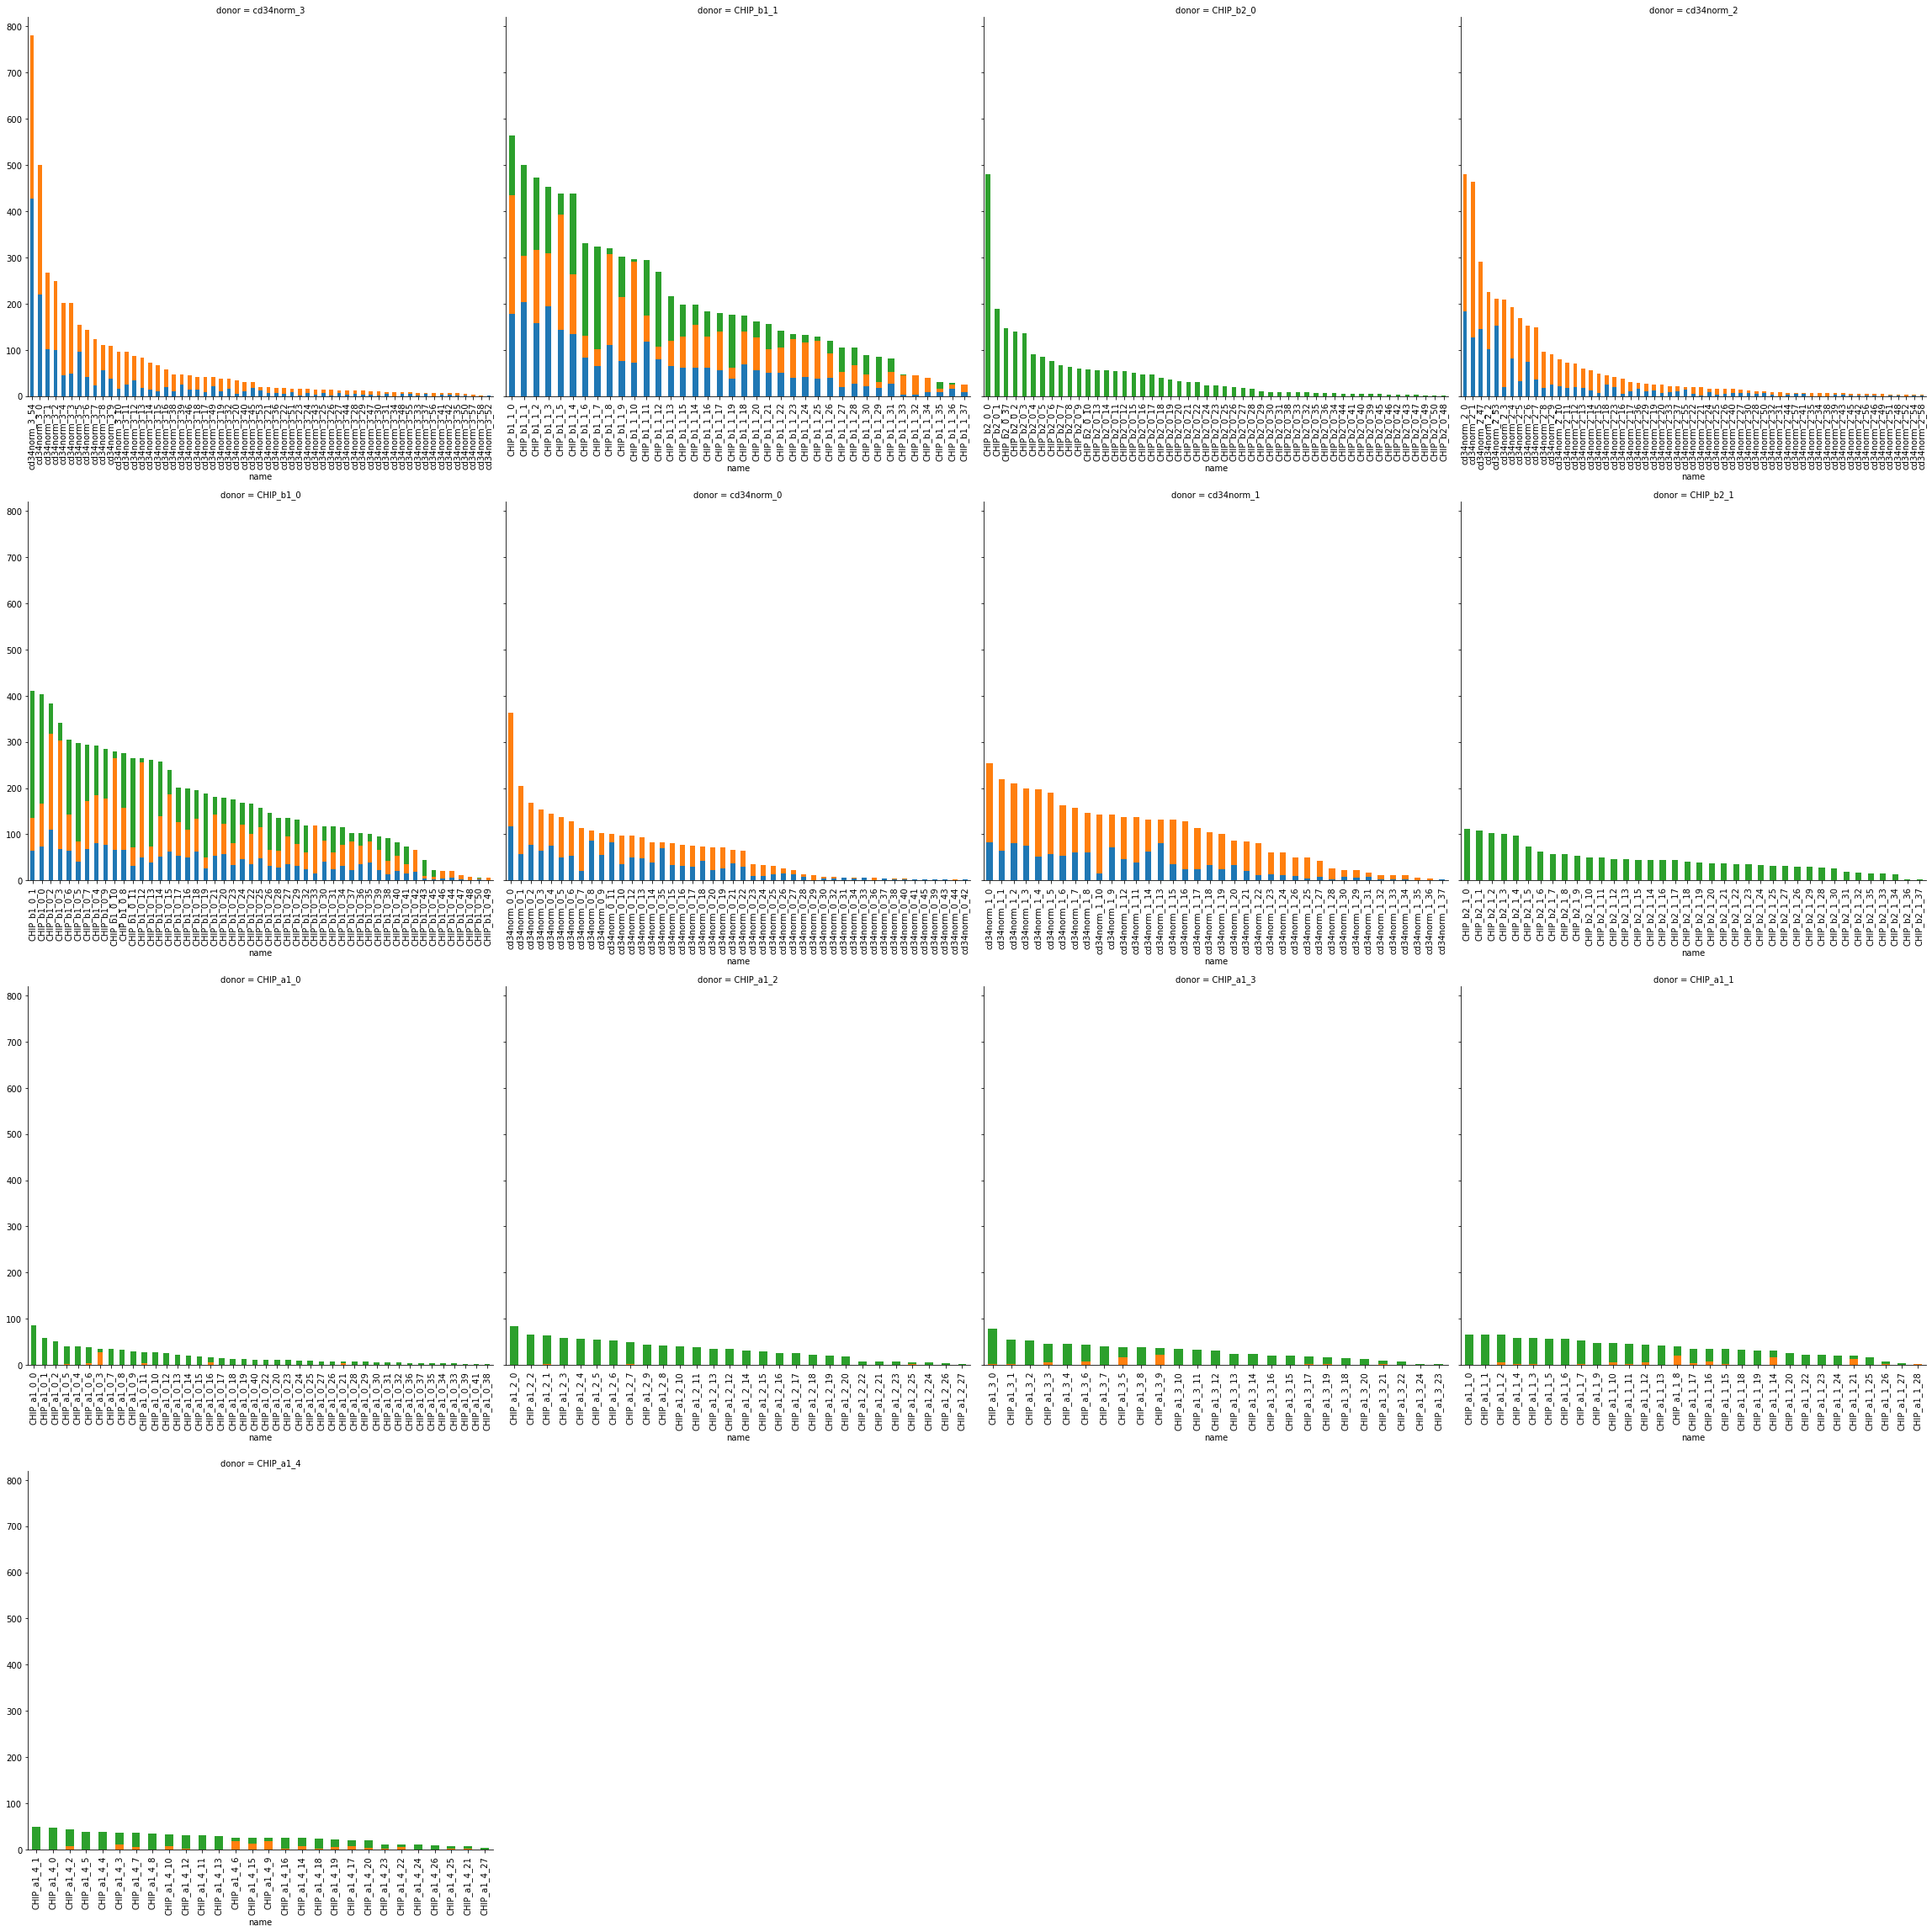

In [8]:
g = sns.FacetGrid(data=clone_counts_filt_10_df, col="donor", col_wrap=4, sharex=False, height=8)
g.map_dataframe(plots_donor)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

plt.savefig(figures_d['f1a'], bbox_inches='tight', dpi=300)

## F1b: All clone sizes barplot sorted by size and stacked color by condition. Each donor in their own panel. Different Y-axis.

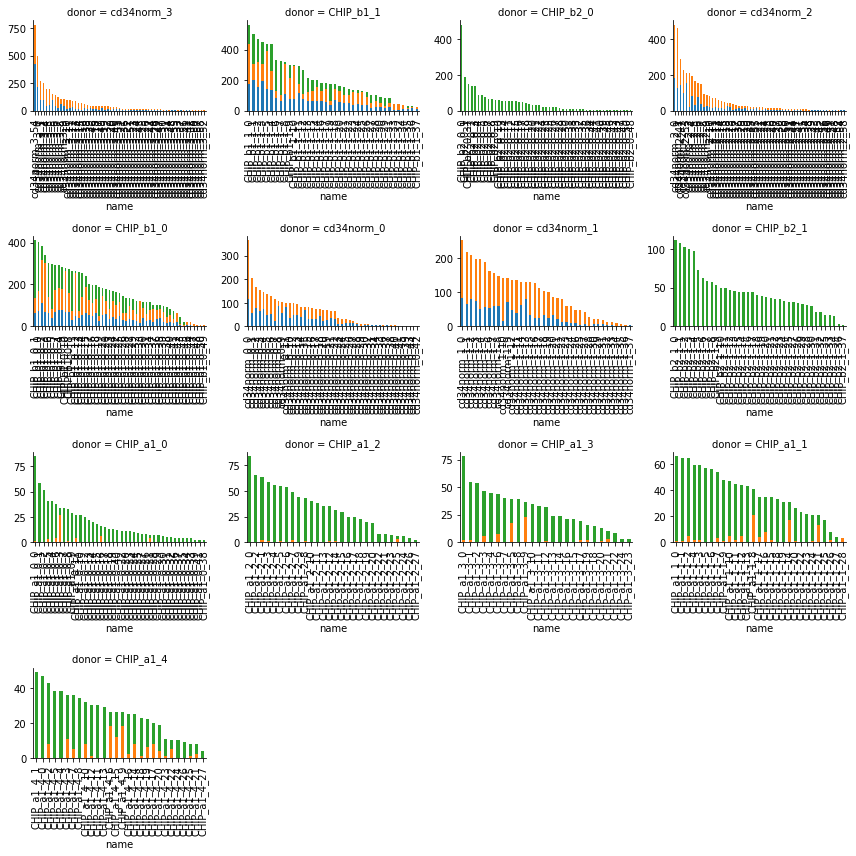

In [9]:
g = sns.FacetGrid(data=clone_counts_filt_10_df, col="donor", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(plots_donor)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
plt.savefig(figures_d['f1b'], bbox_inches='tight', dpi=300)

## Step 2. Normalize clones to within condition and group

In [10]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/group_counts.loc[(x["condition"], x["donor"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["condition", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("condition")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df




sum of normed values condition  donor     
Control    CHIP_b1_0     1.0
           CHIP_b1_1     1.0
           cd34norm_0    1.0
           cd34norm_1    1.0
           cd34norm_2    1.0
           cd34norm_3    1.0
Flt3l      CHIP_a1_0     1.0
           CHIP_a1_1     1.0
           CHIP_a1_2     1.0
           CHIP_a1_3     1.0
           CHIP_a1_4     1.0
           CHIP_b1_0     1.0
           CHIP_b1_1     1.0
           cd34norm_0    1.0
           cd34norm_1    1.0
           cd34norm_2    1.0
           cd34norm_3    1.0
Input      CHIP_a1_0     1.0
           CHIP_a1_1     1.0
           CHIP_a1_2     1.0
           CHIP_a1_3     1.0
           CHIP_a1_4     1.0
           CHIP_b1_0     1.0
           CHIP_b1_1     1.0
           CHIP_b2_0     1.0
           CHIP_b2_1     1.0
Name: ncells, dtype: float64


,donor,ncells,Control,Flt3l,Input
name,,,,,
CHIP_a1_0_3,CHIP_a1_0,0.549524,0.000000,0.540000,0.009524
cd34norm_3_54,cd34norm_3,0.407574,0.269521,0.138052,0.000000
CHIP_a1_3_9,CHIP_a1_3,0.367408,0.000000,0.348485,0.018923
CHIP_a1_3_5,CHIP_a1_3,0.289599,0.000000,0.257576,0.032023
cd34norm_2_0,cd34norm_2,0.264695,0.139695,0.125000,0.000000
...,...,...,...,...,...
cd34norm_3_52,cd34norm_3,0.001021,0.000630,0.000391,0.000000
CHIP_b2_0_49,CHIP_b2_0,0.000853,0.000000,0.000000,0.000853
CHIP_b2_0_50,CHIP_b2_0,0.000853,0.000000,0.000000,0.000853


# F2: Normalized version of F1. (same y) 

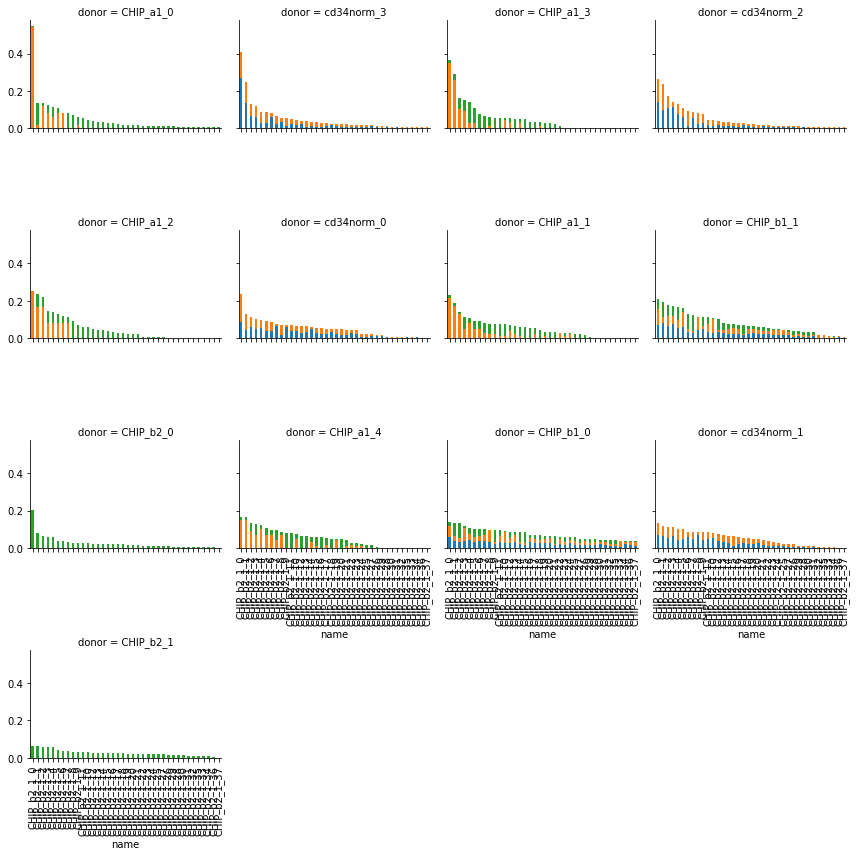

In [11]:
g = sns.FacetGrid(data=clone_norm_df, col="donor", col_wrap=4)
g.map_dataframe(plots_donor)
plt.savefig(figures_d['f2'], bbox_inches='tight', dpi=300)

## Step 3. Add rank to each clone per donor and then take keep_top clones

In [12]:
ranks = clone_norm_df.groupby("donor")['ncells'].rank(ascending=False).astype(int)
clone_norm_df['rank'] = ranks
clone_norm_df

,donor,ncells,Control,Flt3l,Input,rank
name,,,,,,
CHIP_a1_0_3,CHIP_a1_0,0.549524,0.000000,0.540000,0.009524,1
cd34norm_3_54,cd34norm_3,0.407574,0.269521,0.138052,0.000000,1
CHIP_a1_3_9,CHIP_a1_3,0.367408,0.000000,0.348485,0.018923,1
CHIP_a1_3_5,CHIP_a1_3,0.289599,0.000000,0.257576,0.032023,2
cd34norm_2_0,cd34norm_2,0.264695,0.139695,0.125000,0.000000,1
...,...,...,...,...,...,...
cd34norm_3_52,cd34norm_3,0.001021,0.000630,0.000391,0.000000,58
CHIP_b2_0_49,CHIP_b2_0,0.000853,0.000000,0.000000,0.000853,50
CHIP_b2_0_50,CHIP_b2_0,0.000853,0.000000,0.000000,0.000853,50


In [13]:
top_clone_norm_df = clone_norm_df[clone_norm_df["rank"]<keep_top]
top_clone_norm_df

,donor,ncells,Control,Flt3l,Input,rank
name,,,,,,
CHIP_a1_0_3,CHIP_a1_0,0.549524,0.000000,0.540000,0.009524,1
cd34norm_3_54,cd34norm_3,0.407574,0.269521,0.138052,0.000000,1
CHIP_a1_3_9,CHIP_a1_3,0.367408,0.000000,0.348485,0.018923,1
CHIP_a1_3_5,CHIP_a1_3,0.289599,0.000000,0.257576,0.032023,2
cd34norm_2_0,cd34norm_2,0.264695,0.139695,0.125000,0.000000,1
...,...,...,...,...,...,...
CHIP_b2_0_11,CHIP_b2_0,0.023028,0.000000,0.000000,0.023028,15
CHIP_b2_0_15,CHIP_b2_0,0.021748,0.000000,0.000000,0.021748,17
CHIP_a1_0_17,CHIP_a1_0,0.020408,0.000000,0.000000,0.020408,19


## F3a. Normalized top clones same Y-axis. (same as F2 but just the top). 

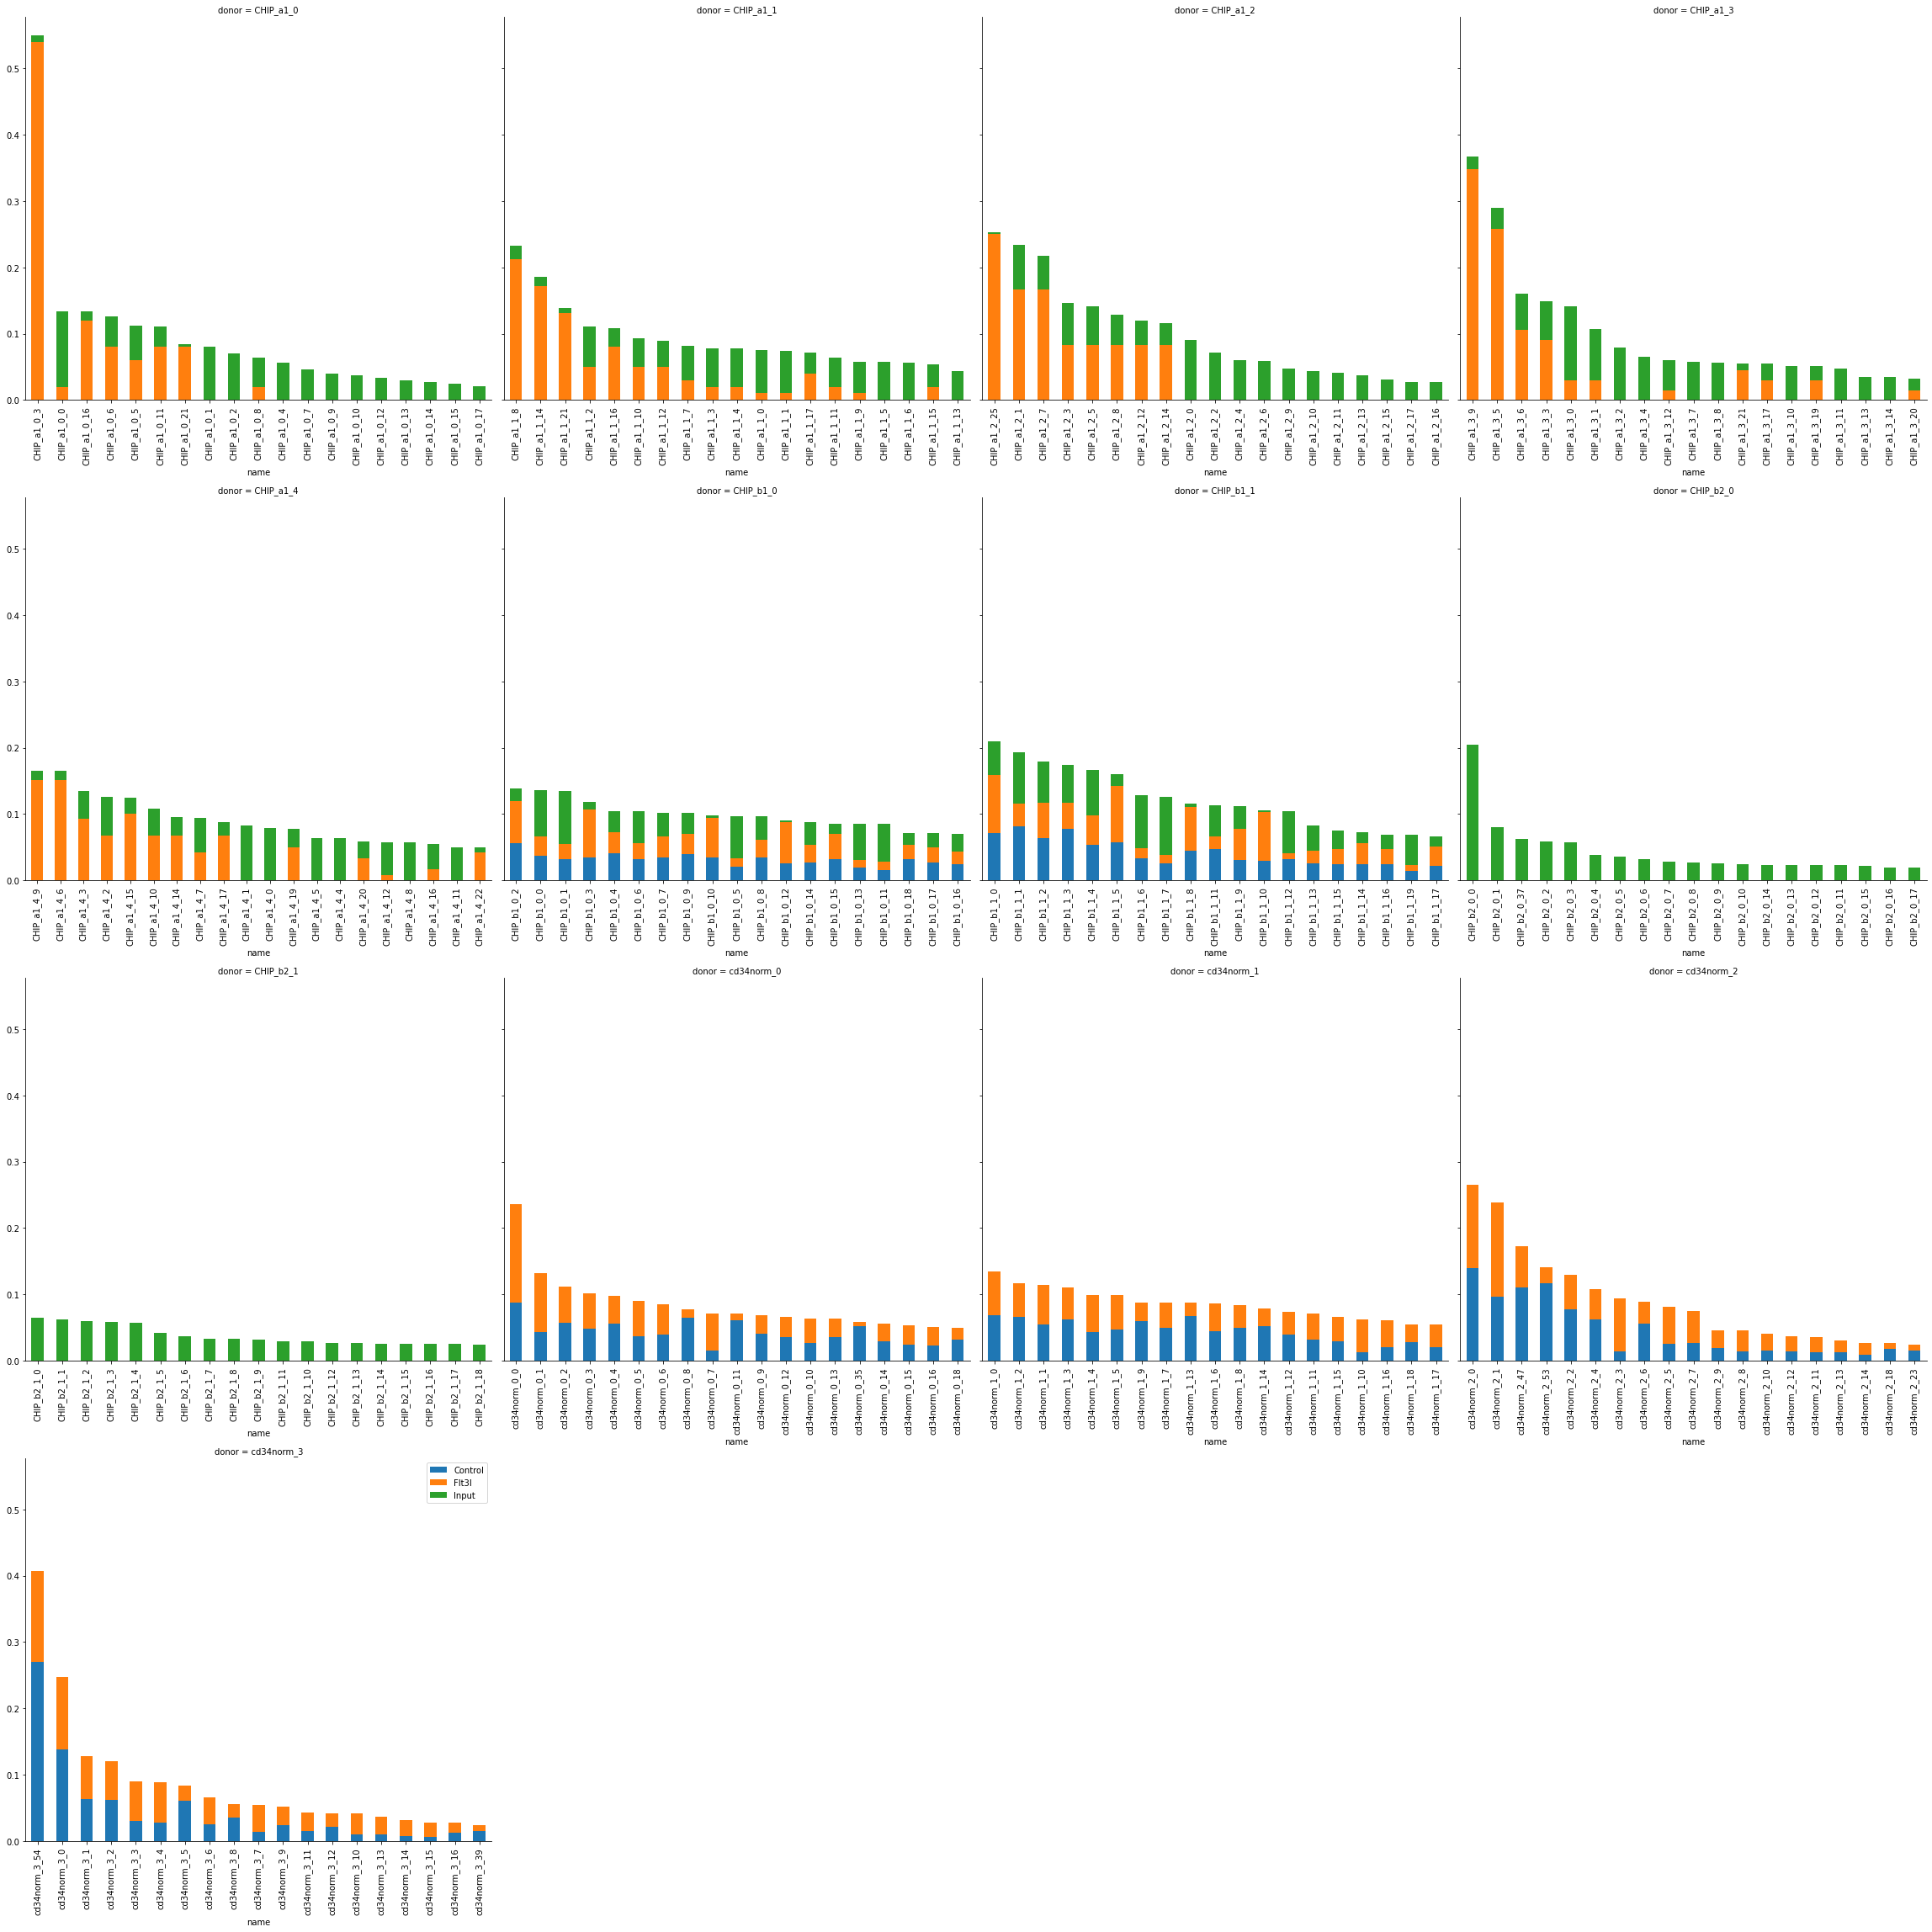

In [14]:
g = sns.FacetGrid(data=top_clone_norm_df.sort_values(["donor", "rank"]).drop('rank',axis=1), col="donor", col_wrap=4,
                 height=8, sharex=False)
g.map_dataframe(plots_donor)
plt.legend()
plt.savefig(figures_d['f3a'], bbox_inches='tight', dpi=300)

## F3b. Normalized top clones but different Y-axis

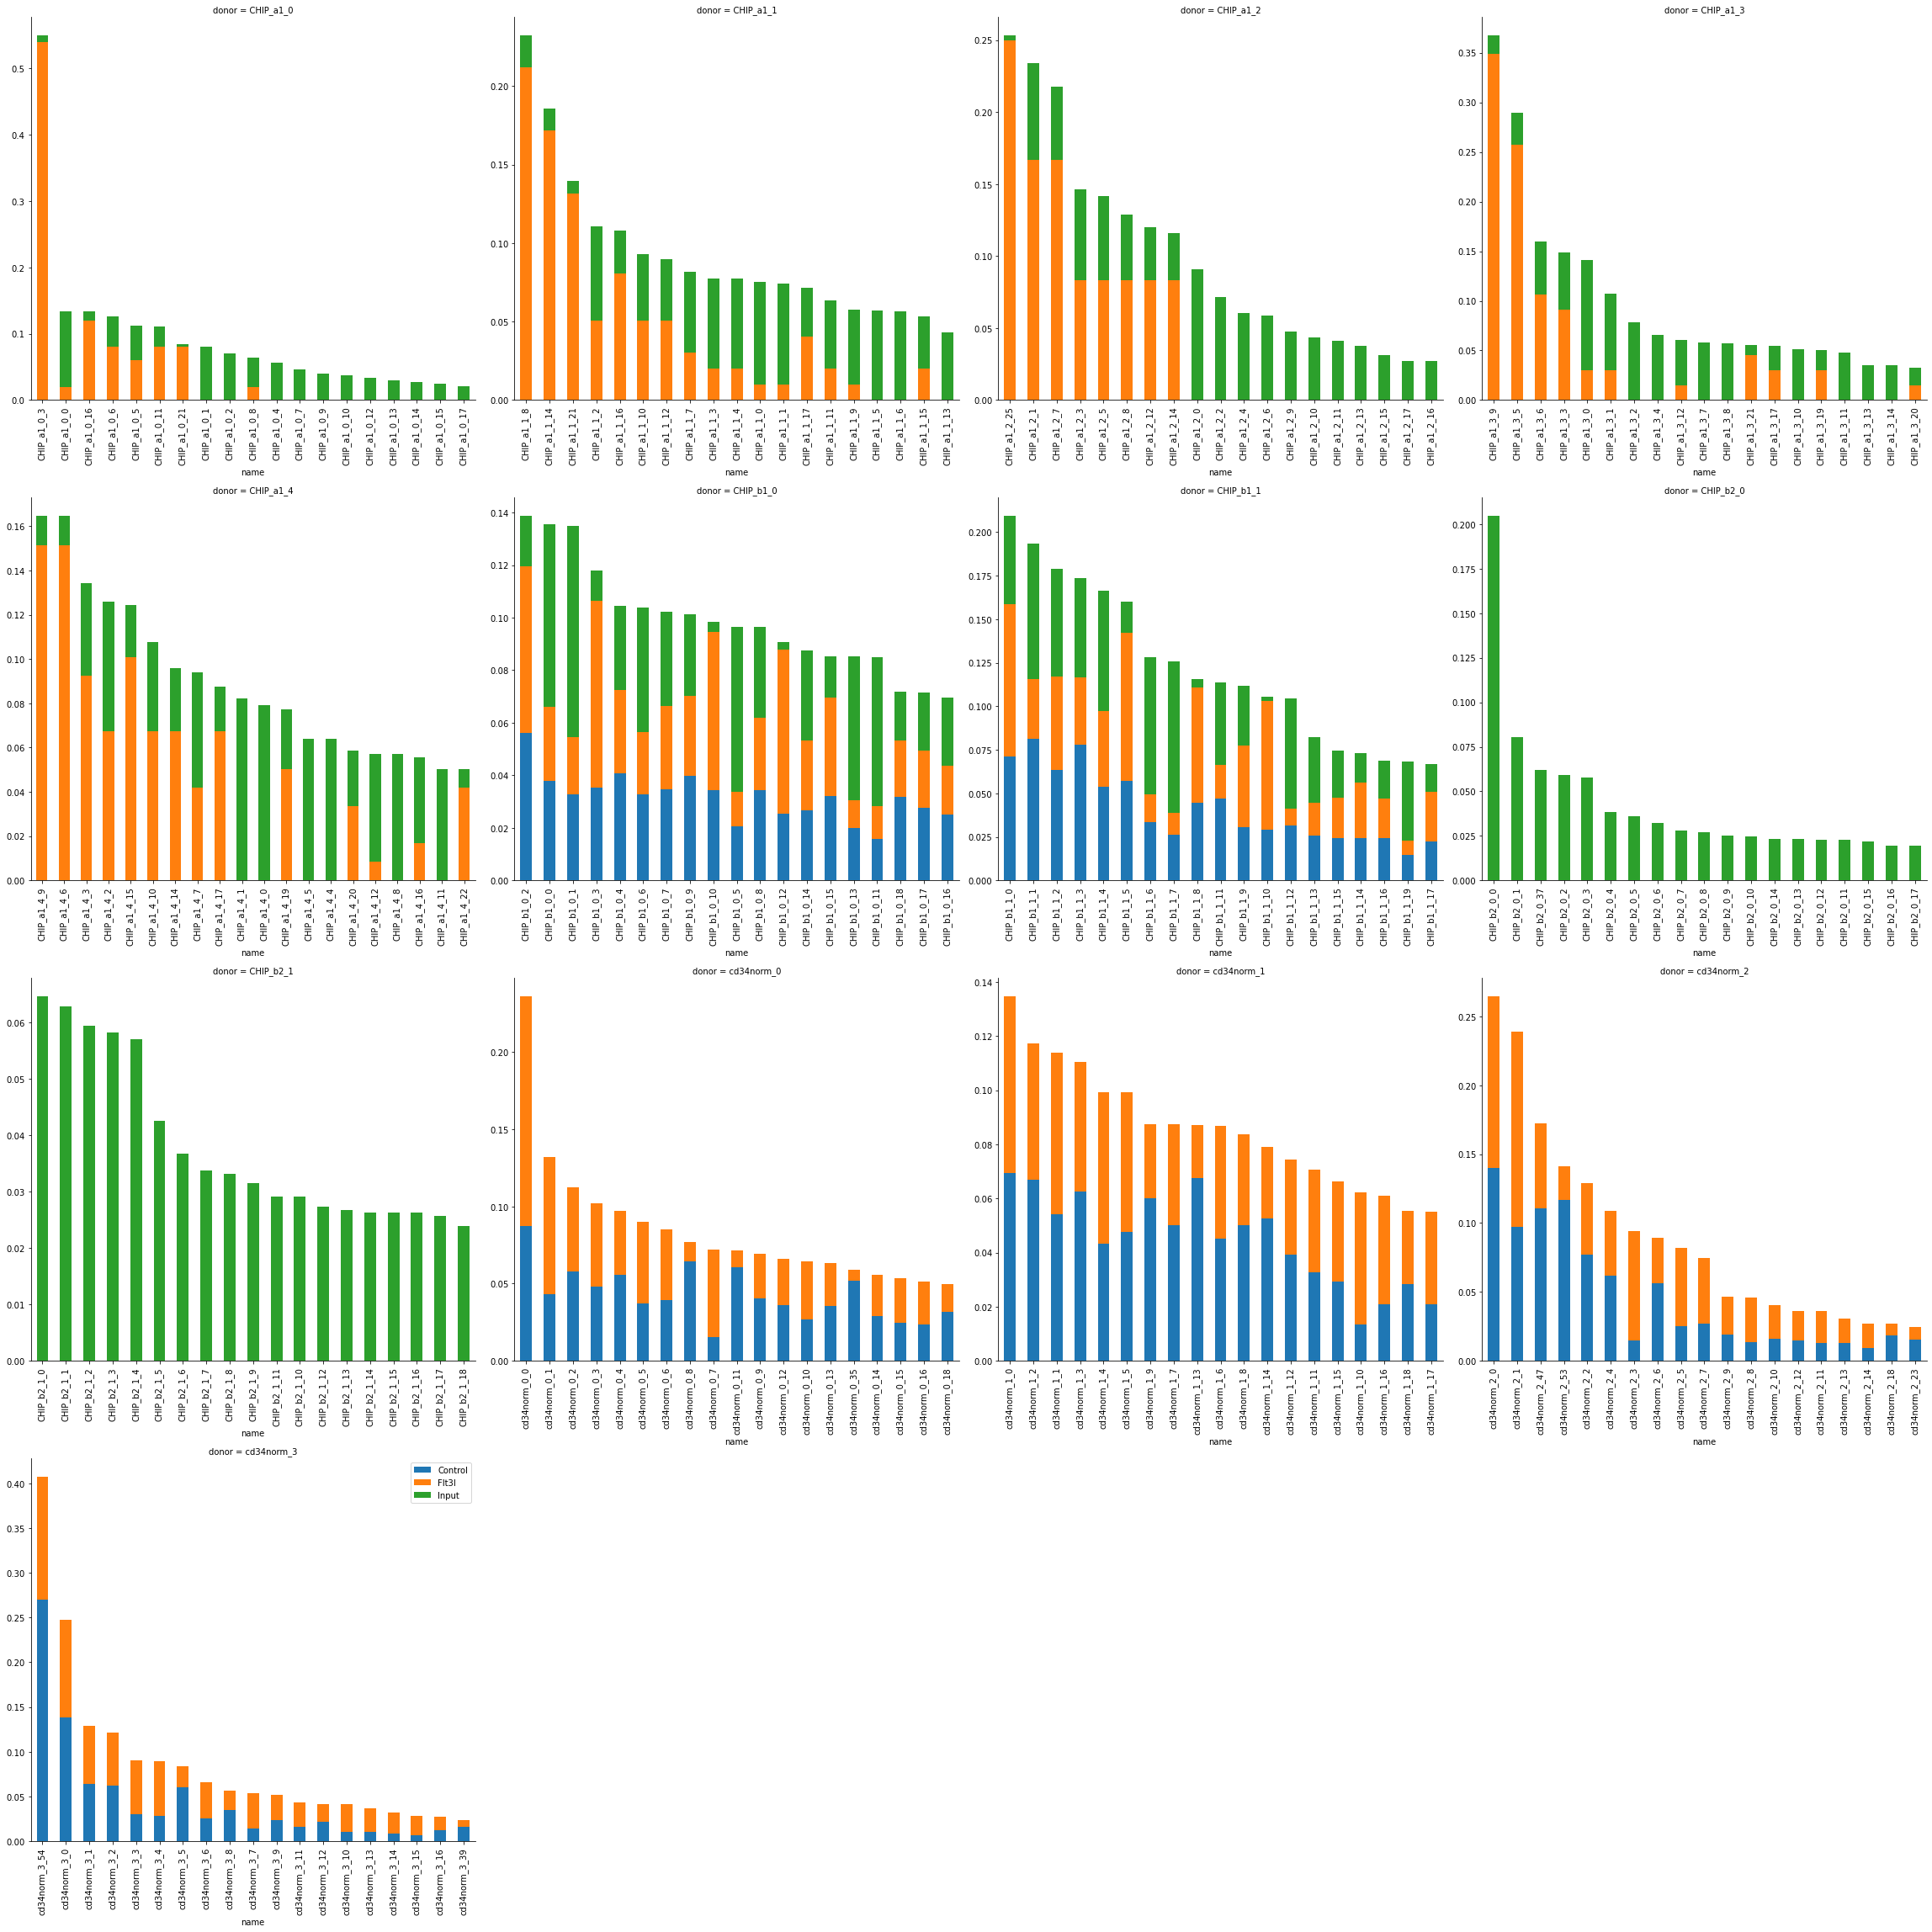

In [15]:
g = sns.FacetGrid(data=top_clone_norm_df.sort_values(["donor", "rank"]).drop('rank',axis=1), 
                  col="donor", col_wrap=4, sharex=False, sharey=False,
                 height=8)
g.map_dataframe(plots_donor)
plt.legend()
plt.savefig(figures_d['f3b'], bbox_inches='tight', dpi=300)

## F4. Normalized top clones, but putting them into the same panel
(use 'keep_top_single' instead of 'keep_top')

In [16]:
clone_norm_df[clone_norm_df["rank"]<keep_top_single]

,donor,ncells,Control,Flt3l,Input,rank
name,,,,,,
CHIP_a1_0_3,CHIP_a1_0,0.549524,0.000000,0.540000,0.009524,1
cd34norm_3_54,cd34norm_3,0.407574,0.269521,0.138052,0.000000,1
CHIP_a1_3_9,CHIP_a1_3,0.367408,0.000000,0.348485,0.018923,1
CHIP_a1_3_5,CHIP_a1_3,0.289599,0.000000,0.257576,0.032023,2
cd34norm_2_0,cd34norm_2,0.264695,0.139695,0.125000,0.000000,1
...,...,...,...,...,...,...
CHIP_b2_0_5,CHIP_b2_0,0.036247,0.000000,0.000000,0.036247,7
CHIP_b2_1_7,CHIP_b2_1,0.033780,0.000000,0.000000,0.033780,8
CHIP_b2_1_8,CHIP_b2_1,0.033197,0.000000,0.000000,0.033197,9


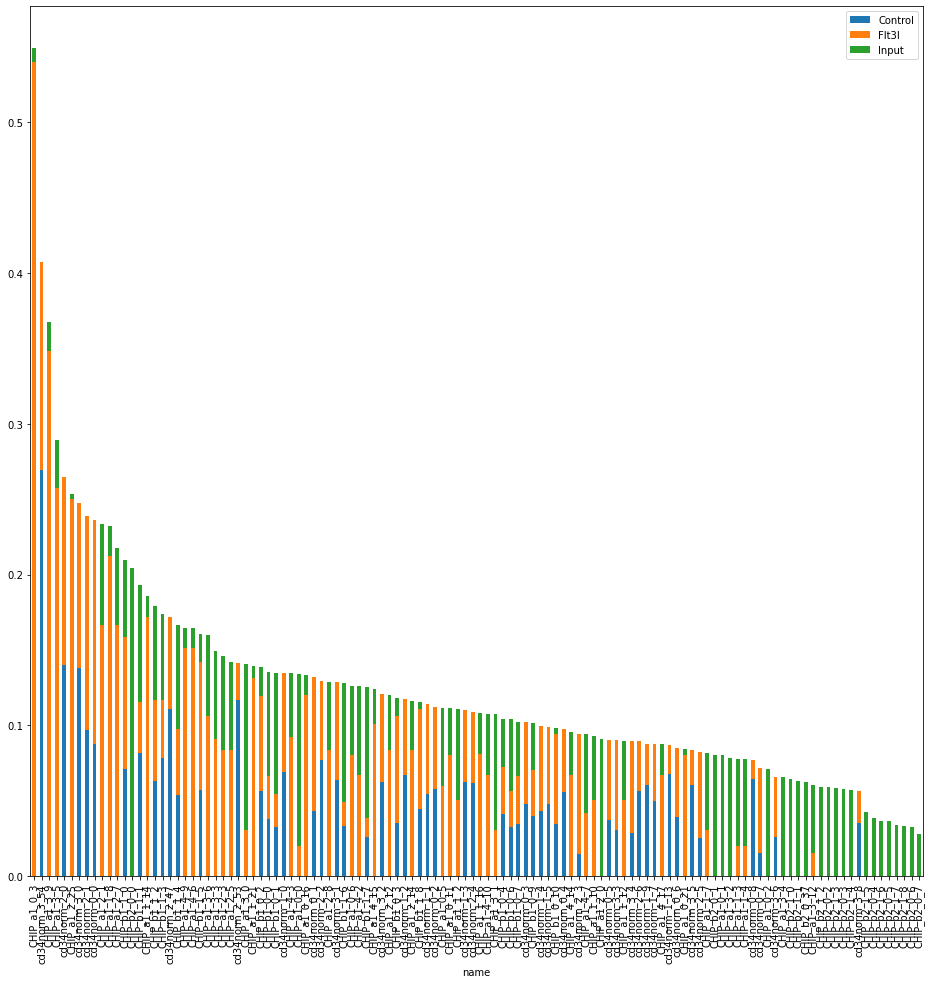

In [17]:
f, ax = plt.subplots(figsize=(16,16))
clone_norm_df[clone_norm_df["rank"]<keep_top_single].sort_values("ncells")[::-1].drop(["donor", "ncells", "rank"], 
                                             axis=1).plot.bar(stacked=True, ax = ax)

plt.savefig(figures_d['f4'], bbox_inches='tight', dpi=300)

## Step 4. Only input conditions

## F5a. Same as F4 but only Input samples 

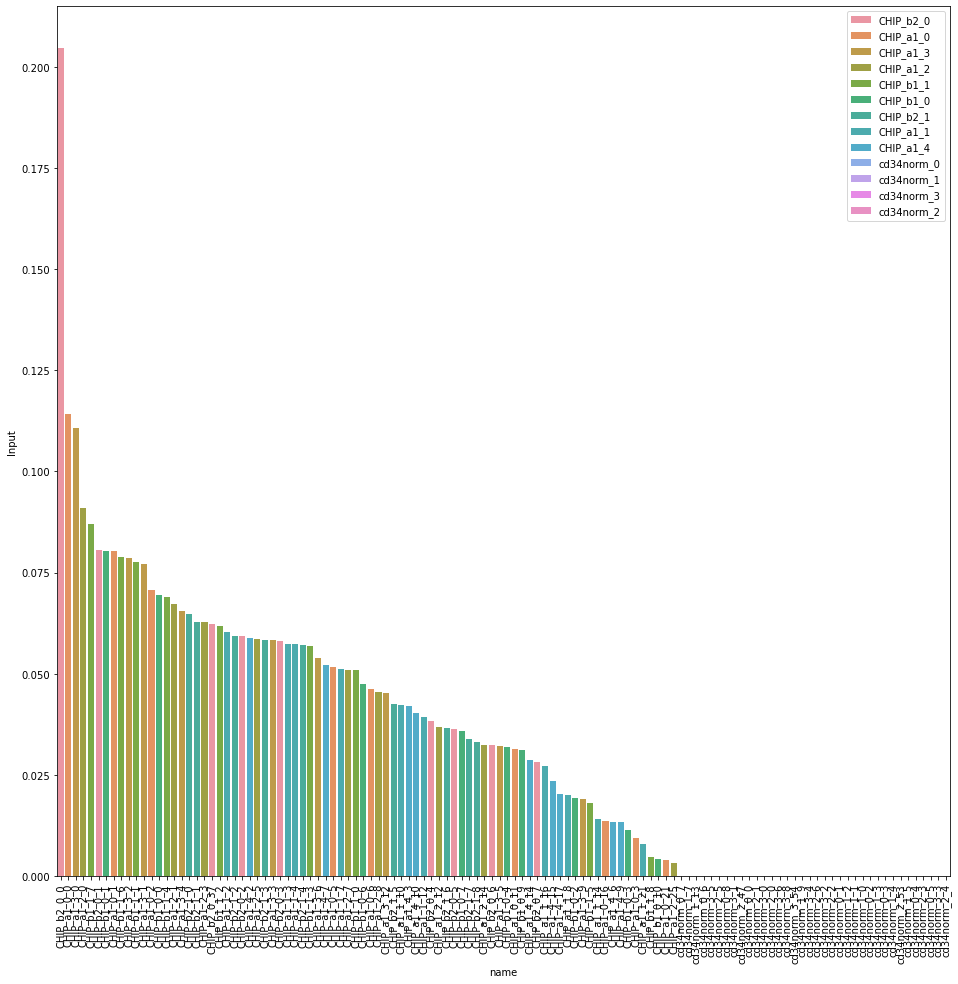

In [18]:
f = plt.figure(figsize=(16,16))
sns.barplot(data=clone_norm_df[clone_norm_df["rank"]<keep_top_single].reset_index().sort_values("Input")[::-1], 
            x="name", y="Input", dodge=False,
           hue="donor")
plt.legend()
plt.xticks(rotation=90);
plt.savefig(figures_d['f5a'], bbox_inches='tight', dpi=300)

## F5b. Same as F5 but only  sqrt of normalized value

In [19]:
## sqrt of value
clone_norm_df_sqrt = clone_norm_df.copy()
clone_norm_df_sqrt["Input"] = np.sqrt(clone_norm_df_sqrt["Input"])

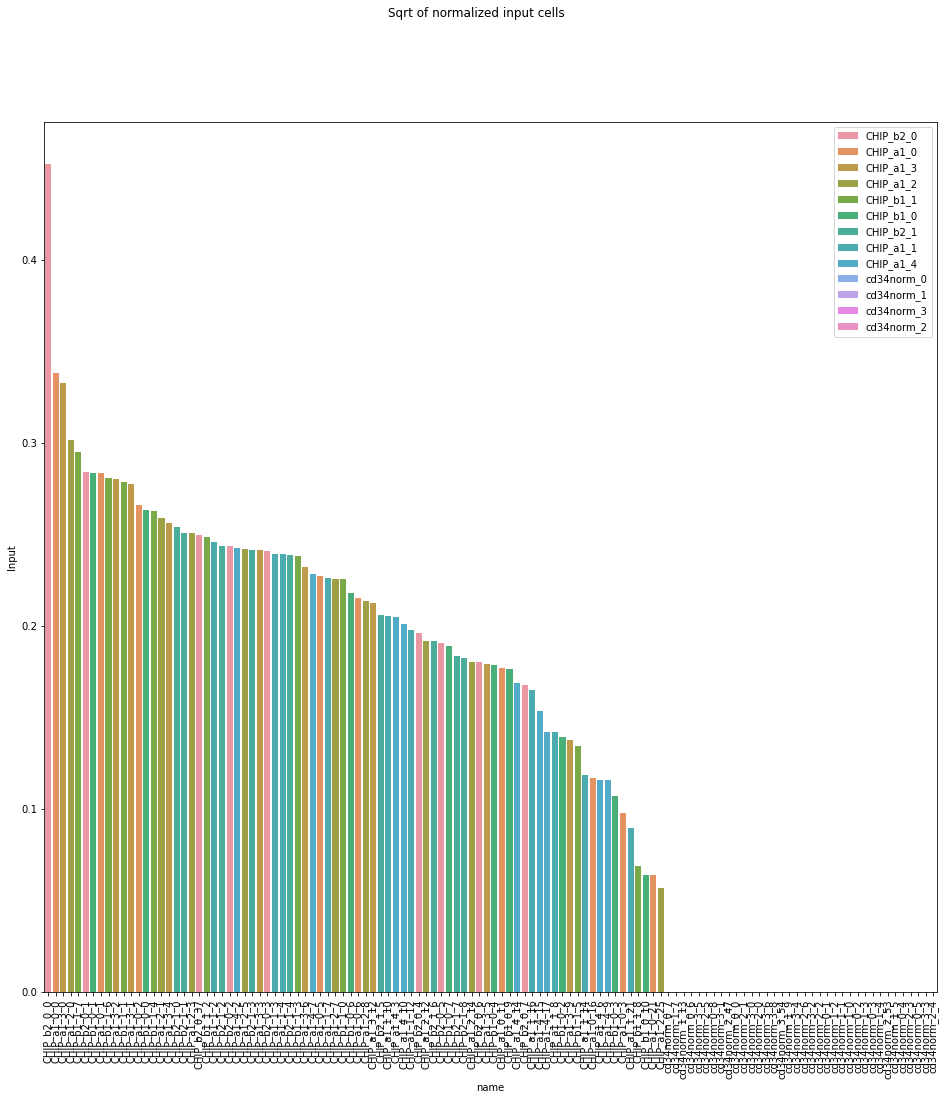

In [20]:
f = plt.figure(figsize=(16,16))
sns.barplot(data=clone_norm_df_sqrt[clone_norm_df_sqrt["rank"]<keep_top_single].reset_index().sort_values("Input")[::-1],
            x="name", y="Input", dodge=False,
           hue="donor")
plt.legend()
plt.xticks(rotation=90);
plt.suptitle("Sqrt of normalized input cells")
plt.savefig(figures_d['f5b'], bbox_inches='tight', dpi=300)

## F6. Normalized top clones using only Input.  Similar to F3B but only Input cells

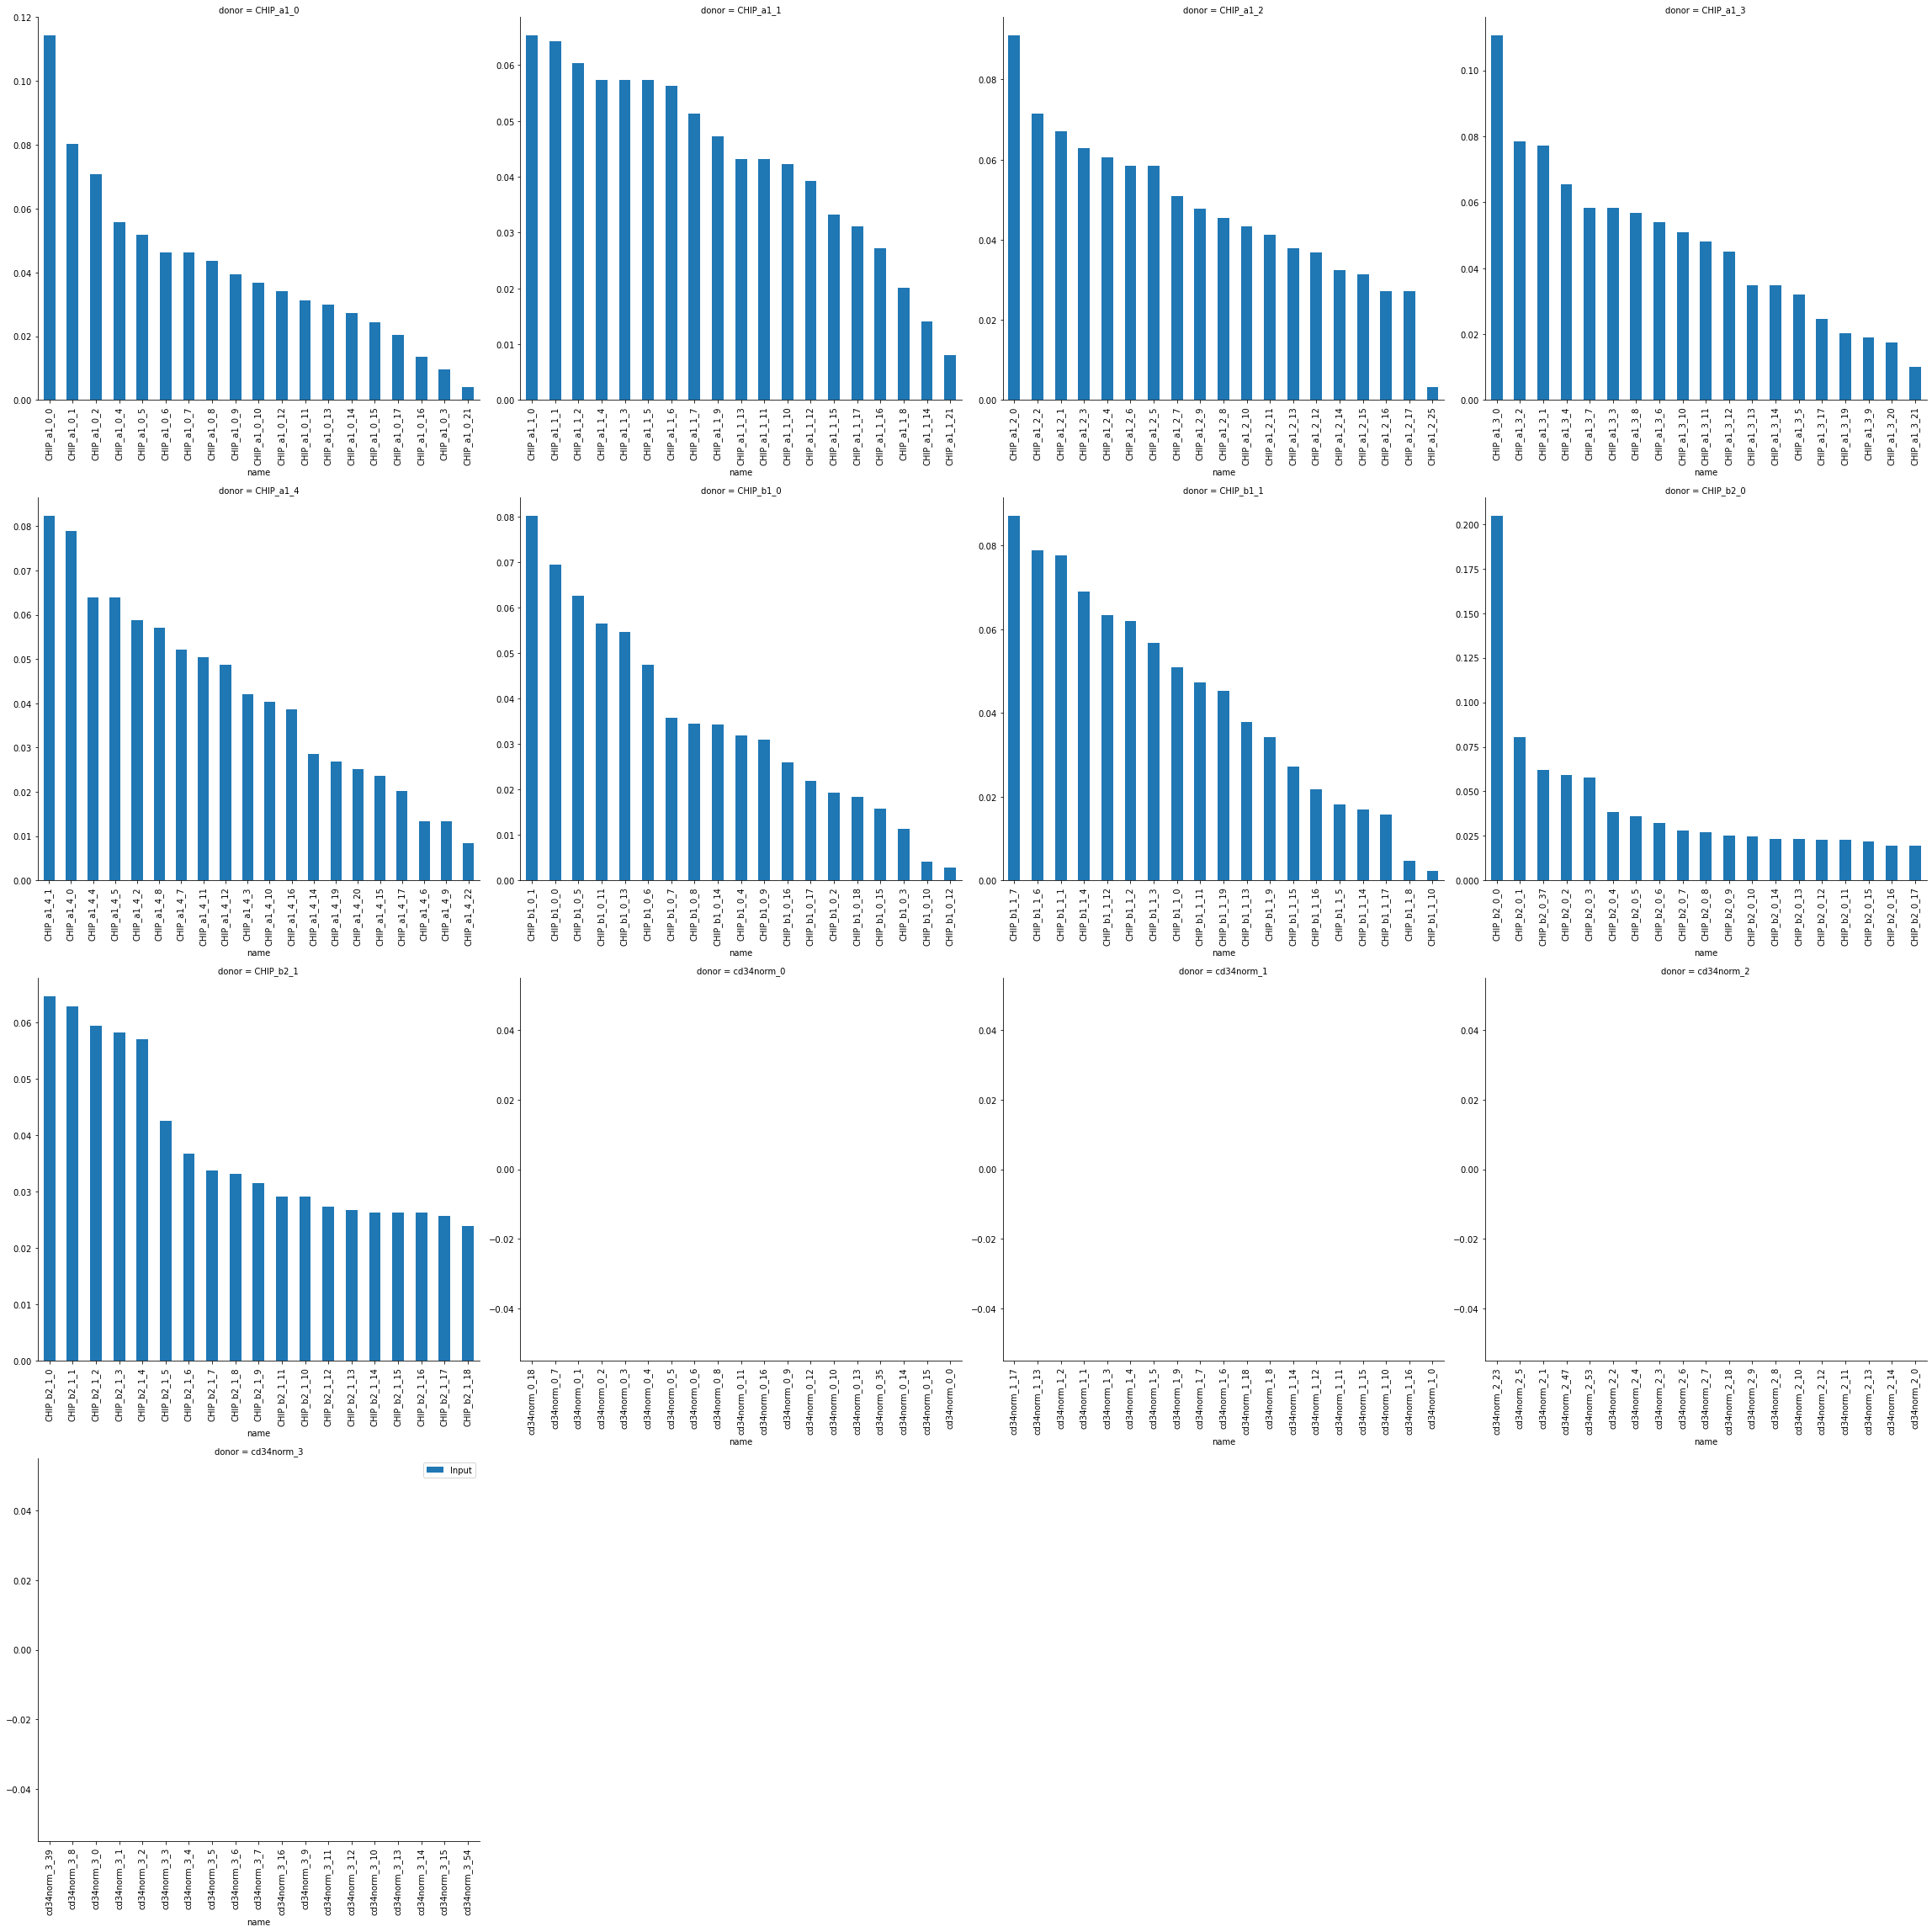

In [21]:
g = sns.FacetGrid(data=top_clone_norm_df.sort_values(["donor", "rank"])[["ncells", "donor", "Input"]], 
                  col="donor", col_wrap=4, sharex=False, sharey=False,
                 height=8)
g.map_dataframe(plots_rerank_donor)
plt.legend()
plt.savefig(figures_d['f6'], bbox_inches='tight', dpi=300)